# Défi de programmation

Votre équipe d'enquêteurs a été mandatée pour enquêter sur un vol de banque. Vous avez réussi à obtenir des informations sur les transactions bancaires effectuées par les criminels avec l'argent volé. Vous devez maintenant analyser ces données pour trouver des preuves qui vous permettront de les arrêter.

Cette page contient un ensemble de problèmes de programmation qui vous aideront à analyser les transactions frauduleuses. Vous devez écrire les réponses aux problèmes sur le formulaire fourni. Chaque problème réussi rapporte **x points** à votre équipe. Bonne chance!


## Problème #1: intérêt simple et composé

L'intérêt est l'argent que vous gagnez sur un placement (ou que vous payez sur un emprunt!). L'intérêt est souvent calculé de deux façons: simple ou composé.
- L'intérêt simple est calculé sur le montant initial uniquement. Sa formule est donnée par:
$$
\text{Intérêt simple} = p \times r \times t,
$$
où $p$ est le montant initial, $r$ est le taux d'intérêt et $t$ est le temps en années.
- L'intérêt composé est calculé sur le montant initial et sur l'intérêt accumulé. Sa formule est donnée par:
$$
\text{Intérêt composé} = p \times \left(1 + \frac{r}{n}\right)^{(n \times t)} - p,
$$
où $p$ est le montant initial, $r$ est le taux d'intérêt, $t$ est le temps en années et $n$ est le nombre de fois que l'intérêt est composé par année.

Les voleurs ont placé une partie de l'argent volé dans un compte bancaire. Vous savez que le montant initial placé dans le compte était de 1000 $, que le taux d'intérêt est de 5 % et que le temps est de 15 ans. L'intérêt est composé 4 fois par année.

Vous devez **compléter** la fonction `calculer_interet_compose` du programme informatique ci-dessous (**indices:** l'opérateur de division est `/` et l'opérateur d'exponentiation est `**`). Puis, vous devez **exécuter** le code (en cliquant sur la flèche) pour calculer l'intérêt simple et l'intérêt composé gagnés sur ce placement. Vous constaterez l'importance de l'intérêt composé pour faire fructifier un placement (vous pouvez aussi simuler une durée plus longue pour voir clairement l'effet exponentiel).


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def calculer_interet_simple(p, r, t):
    interet_simple = p * r * t
    return interet_simple

def calculer_interet_compose(p, r, t, n):
    # TODO: implémenter la formule de l'intérêt composé
    pass


p = 1000
r = 5 / 100
t = 15
n = 4

fig, ax = plt.subplots()

ts = np.arange(0, t + 1, 1)
interets_simples = calculer_interet_simple(p, r, ts)
interets_composes = calculer_interet_compose(p, r, ts, n)

ax.plot(ts, interets_simples, label="Intérêt simple")
ax.plot(ts, interets_composes, label="Intérêt composé")
ax.annotate(f"{interets_simples[-1]:.2f} $", (ts[-1], interets_simples[-1]), textcoords="offset points", xytext=(-50, 0), ha='center', bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black"), arrowprops=dict(arrowstyle="->"))
ax.annotate(f"{interets_composes[-1]:.2f} $", (ts[-1], interets_composes[-1]), textcoords="offset points", xytext=(-50, 0), ha='center', bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black"), arrowprops=dict(arrowstyle="->"))
ax.set_xlabel("Année")
ax.set_ylabel("Intérêt ($)")
ax.tick_params(direction='in', top=True, right=True)
ax.legend(frameon=False)

plt.show()


## Problème #2: valeur future d'une série de dépôts annuels

Dans le problème précédent, nous avons calculé l'intérêt gagné sur un placement initial. Mais que se passe-t-il si les voleurs font des dépôts annuels dans le compte? La valeur future de ces dépôts peut être calculée en utilisant la formule suivante:
$$
\text{Valeur future} = p \times \left(\frac{(1 + r)^t - 1}{r}\right),
$$
où $p$ est le montant du dépôt annuel, $r$ est le taux d'intérêt et $t$ est le temps en années.

Supposons que les voleurs ont fait des dépôts annuels de 1000 $ à la fin de chaque année pendant 15 ans dans un compte bancaire ayant un taux d'intérêt de 5 %.

Vous devez **créer** une fonction nommée `calculer_valeur_future` qui prend en entrée le montant du dépôt annuel $p$, le taux d'intérêt $r$ et le temps en années $t$, et qui retourne la valeur future des dépôts (**indice**: prenez l'exemple des fonctions définies dans le problème #1). Puis, vous devez **exécuter** le code (en cliquant sur la flèche) pour calculer la valeur future du compte bancaire des voleurs. Quel est l'intérêt gagné, c'est-à-dire la différence entre la valeur future et la somme des dépôts annuels? Vous constaterez l'importance d'être constant et de faire des dépôts réguliers pour accroître la valeur de son patrimoine.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# TODO: implémenter la fonction calculer_valeur_future telle que décrite dans l'énoncé


p = 1000
r = 5 / 100
t = 15

fig, ax = plt.subplots()

ts = np.arange(0, t + 1, 1)
valeurs_futures = calculer_valeur_future(p, r, ts)

ax.plot(ts, valeurs_futures, label="Valeur future")
for i in range(1, t + 1):
    ax.plot([i-1, i], [p * (i-1), p * (i-1)], color="black")
    ax.plot([i, i], [p * (i-1), p * i], color="black")
    if i == t // 2:
        ax.annotate(f"{p:.2f} $ / an", (i, p * i), textcoords="offset points", xytext=(25, -25), ha='center')
ax.plot([t, t], [p * t, valeurs_futures[-1]], color="red", linestyle="--", label="Intérêt gagné")
ax.annotate(f"{valeurs_futures[-1] - p * t:.2f} $", (ts[-1], (p*t + valeurs_futures[-1])/2), textcoords="offset points", xytext=(-50, 0), ha='center', bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black"), arrowprops=dict(arrowstyle="->"))
ax.set_xlabel("Année")
ax.set_ylabel("Valeur future ($)")
ax.tick_params(direction='in', top=True, right=True)
ax.legend(frameon=False)

plt.show()


## Problème #3: rendement du marché boursier

Précédemment, nous avons calculé l'intérêt gagné sur un placement dans un compte bancaire. Maintenant, nous explorerons ce qu'il se passe si les voleurs investissent l'argent volé dans le marché boursier. Les actions boursières sont des titres de propriété d'une entreprise. Les investisseurs achètent des actions dans l'espoir que leur valeur augmentera avec le temps. Le rendement du marché boursier est souvent plus élevé que le taux d'intérêt des comptes bancaires, mais il est aussi plus volatile.

**Exécuter** le code ci-dessous pour visualiser l'évolution de 1000 $ investis dans le marché boursier en 2000. Vous n'avez rien à coder ici.

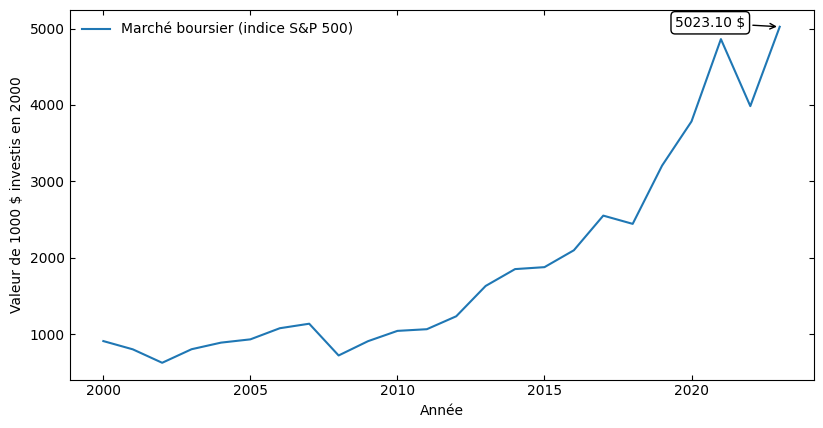

In [100]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

table = pd.read_csv("annual_returns.csv", index_col="year")

def calculer_valeur_actif(p, actif):
    valeurs = np.zeros(len(table))
    for i, year in enumerate(table.index):
        p *= (1 + table.loc[year, actif]/100)
        valeurs[i] = p
    return valeurs


valeurs_actions = calculer_valeur_actif(1000, "sp500")

fig, ax = plt.subplots(figsize=(9.6, 4.8))

ax.plot(table.index, valeurs_actions, label="Marché boursier (indice S&P 500)")
ax.annotate(f"{valeurs_actions[-1]:.2f} $", (table.index[-1], valeurs_actions[-1]), textcoords="offset points", xytext=(-50, 0), ha='center', bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black"), arrowprops=dict(arrowstyle="->"))
ax.set_xlabel("Année")
ax.set_ylabel("Valeur de 1000 \$ investis en 2000")
ax.tick_params(direction='in', top=True, right=True)
ax.legend(frameon=False)

plt.show()


Vous devez maintenant trouver la moyenne géométrique du rendement annuel du marché boursier, ou en d'autres mots l'intérêt composé. Il suffit de diviser la valeur finale par la valeur initiale, de prendre la racine $n$-ième de ce résultat, où $n$ est le nombre d'années, et de soustraire 1. La formule est donnée par:
$$
r = \left(\frac{v}{p}\right)^{(1/n)} - 1,
$$
où $v$ est la valeur finale, $p$ est le montant initial et $n$ est le nombre d'années.

Vous devez **calculer** le rendement annuel et **affecter** le résultat à la variable `r` (**indice:** par exemple, dans l'expression `n = 24`, nous affectons la valeur `24` à la variable `n`. De plus, la valeur finale peut être observée sur le graphique ci-haut). Puis, vous devez **exécuter** le code (en cliquant sur la flèche) pour afficher la moyenne composée. Notez que ce code utilise votre fonction `calculer_interet_compose` définie précédemment (problème #1). Vous constaterez que le rendement annuel moyen est plus élevé que le taux d'intérêt des comptes bancaires, mais que le marché boursier est aussi plus volatile à court terme. Par exemple, de 2000 à 2010, peu de rendement a été généré, mais de 2010 à 2020, le rendement a été très élevé. En bourse, il est important de déployer une stratégie à long terme pour minimiser les risques.


In [ ]:
p = 1000
n = 24

# TODO: calculer le rendement et affecter la valeur à la variable r


fig, ax = plt.subplots(figsize=(9.6, 4.8))

ts = np.arange(0, n, 1)
interets_composes = calculer_interet_compose(p, r, ts, n)

ax.plot(table.index, valeurs_actions, label="Marché boursier (indice S&P 500)")
ax.plot(table.index, interets_composes+p, linestyle="--", color="black", label=f"Intérêt composé (r = {r:.2%})")
ax.set_xlabel("Année")
ax.set_ylabel("Valeur de 1000 \$ investis en 2000")
ax.tick_params(direction='in', top=True, right=True)
ax.legend(frameon=False)

plt.show()


## Problème #4: investissement programmé (*dolar-cost averaging*)

L'investissement programmé, ou *dollar-cost averaging*, est une stratégie d'investissement qui consiste à investir une somme fixe d'argent à intervalles réguliers, quel que soit le prix de l'action. Cette stratégie permet d'acheter plus d'actions lorsque les prix sont bas et moins d'actions lorsque les prix sont élevés. Cela permet de lisser le coût moyen d'achat des actions. Dans le problème précédent, les voleurs avaient investi 1000 \$ dans le marché boursier en 2000. Supposons maintenant qu'ils investissent 100 \$ par an pendant 10 ans, soit de 2000 à 2010. Vous devez **exécuter** le code ci-dessous pour visualiser l'évolution de cet investissement et le comparer à l'investissement précédent. Vous n'avez rien à coder ici.

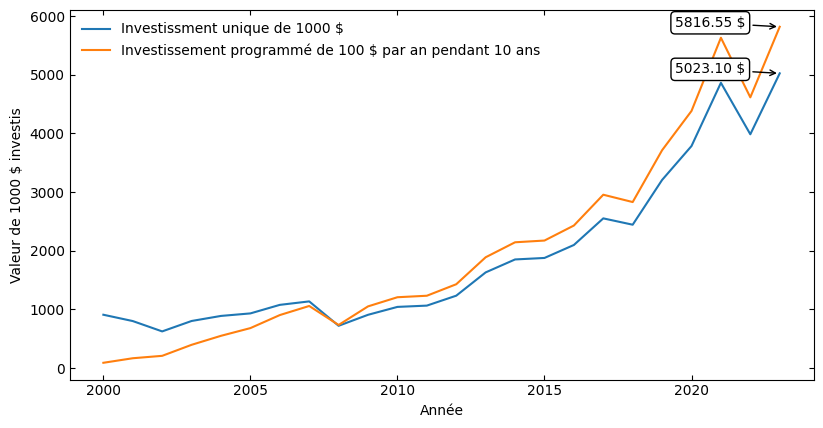

In [106]:
def calculer_valeur_actif_dga(p0, n, actif):
    valeurs = np.zeros(len(table))
    p = p0
    for i, year in enumerate(table.index):
        p *= (1 + table.loc[year, actif]/100)
        valeurs[i] = p
        if i in range(n-1):
            p += p0
    return valeurs


valeurs_actions_dga = calculer_valeur_actif_dga(100, 10, "sp500")

fig, ax = plt.subplots(figsize=(9.6, 4.8))

ax.plot(table.index, valeurs_actions, label="Investissment unique de 1000 $")
ax.plot(table.index, valeurs_actions_dga, label="Investissement programmé de 100 $ par an pendant 10 ans")
ax.annotate(f"{valeurs_actions[-1]:.2f} $", (table.index[-1], valeurs_actions[-1]), textcoords="offset points", xytext=(-50, 0), ha='center', bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black"), arrowprops=dict(arrowstyle="->"))
ax.annotate(f"{valeurs_actions_dga[-1]:.2f} $", (table.index[-1], valeurs_actions_dga[-1]), textcoords="offset points", xytext=(-50, 0), ha='center', bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black"), arrowprops=dict(arrowstyle="->"))
ax.set_xlabel("Année")
ax.set_ylabel("Valeur de 1000 \$ investis")
ax.tick_params(direction='in', top=True, right=True)
ax.legend(frameon=False)

plt.show()


À l'aide de la formule du problème #3, vous devez **calculer** le rendement annuel de l'investissement programmé. Note: pour le montant initial $p$, vous devez utiliser la somme totale investie, soit 1000 \$. Quelle est la différence de rendement entre l'investissement programmé et l'investissement unique? Vous constaterez que même si les deux investissements ont la même somme totale investie, l'investissement programmé a un rendement plus élevé, et cela est d'autant plus vrai si les montants réguliers sont investis en période de récession. Cela démontre l'importance de la discipline et de la régularité dans l'investissement.

In [ ]:
# TODO: calculer le rendement annuel de l'investissement programmé

# TODO: calculer la différence de rendement entre l'investissement unique (problème #3) et l'investissement programmé (problème #4)


## Problème #5: rendement d'un portefeuille d'actions et d'obligations

Pour diversifier leur portefeuille, les voleurs ont investi une partie de l'argent volé dans des obligations. Les obligations sont des titres de dette d'une entreprise ou d'un gouvernement. Les investisseurs prêtent de l'argent à l'émetteur de l'obligation en échange d'un paiement d'intérêt régulier et de la promesse de rembourser le montant initial à une date future. Les obligations sont généralement considérées comme moins risquées que les actions, mais elles offrent aussi un rendement moins élevé à long terme. Vous devez **exécuter** le code ci-dessous pour visualiser l'évolution de 1000 \$ investis dans un portefeuille d'actions ou d'obligations en 2000. Vous n'avez rien à coder ici.

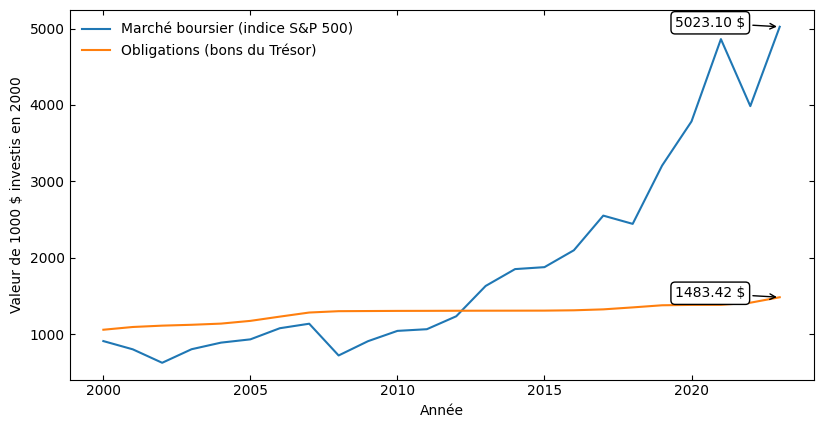

In [110]:
valeurs_actions = calculer_valeur_actif(1000, "sp500")
valeurs_obligations = calculer_valeur_actif(1000, "tbill")

fig, ax = plt.subplots(figsize=(9.6, 4.8))

ax.plot(table.index, valeurs_actions, label="Marché boursier (indice S&P 500)")
ax.plot(table.index, valeurs_obligations, label="Obligations (bons du Trésor)")
ax.annotate(f"{valeurs_actions[-1]:.2f} $", (table.index[-1], valeurs_actions[-1]), textcoords="offset points", xytext=(-50, 0), ha='center', bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black"), arrowprops=dict(arrowstyle="->"))
ax.annotate(f"{valeurs_obligations[-1]:.2f} $", (table.index[-1], valeurs_obligations[-1]), textcoords="offset points", xytext=(-50, 0), ha='center', bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black"), arrowprops=dict(arrowstyle="->"))
ax.set_xlabel("Année")
ax.set_ylabel("Valeur de 1000 \$ investis en 2000")
ax.tick_params(direction='in', top=True, right=True)
ax.legend(frameon=False)

plt.show()

Supposons que les voleurs ont investi 1000 \$ dans un portefeuille 60/40, soit 60 % dans des actions et 40 % dans des obligations. Vous devez **calculer** le rendement annuel moyen du portefeuille. (**indice:** modifier la cellule de code ci-dessus pour simuler 600 \$ dans les actions, et 400 \$ dans les obligations, puis calculer la somme des valeurs finales obtenues. Vous pouvez utiliser la formule du problème #3 pour calculer le rendement annuel moyen du portefeuille). Vous constaterez que le rendement du portefeuille est plus stable que celui des actions seules, mais qu'il est aussi plus élevé que celui des obligations seules. Cela démontre l'importance de diversifier son portefeuille pour minimiser les risques tout en maximisant le rendement.


In [ ]:
# TODO: calculer le rendement annuel du portefeuille 60/40


À titre informatif, voici les retours annuels depuis l'année 2000 pour différentes catégories d'actifs:

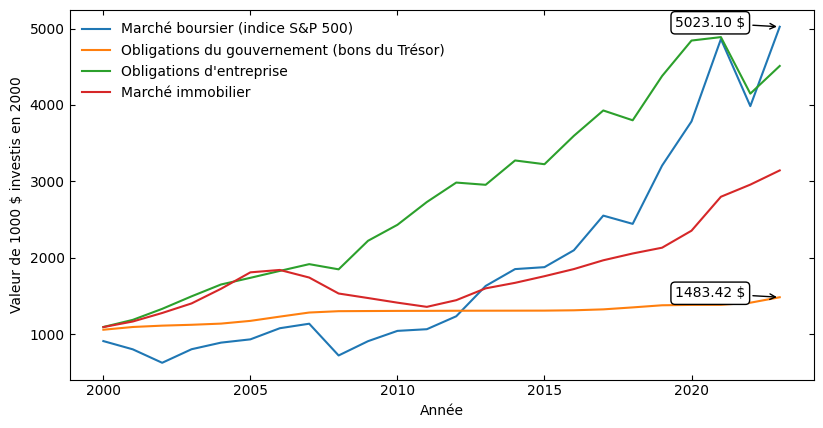

In [112]:
valeurs_actions = calculer_valeur_actif(1000, "sp500")
valeurs_obligations = calculer_valeur_actif(1000, "tbill")
valeurs_obligations_entreprise = calculer_valeur_actif(1000, "corpbond")
valeurs_real_estate = calculer_valeur_actif(1000, "realest")

fig, ax = plt.subplots(figsize=(9.6, 4.8))

ax.plot(table.index, valeurs_actions, label="Marché boursier (indice S&P 500)")
ax.plot(table.index, valeurs_obligations, label="Obligations du gouvernement (bons du Trésor)")
ax.plot(table.index, valeurs_obligations_entreprise, label="Obligations d'entreprise")
ax.plot(table.index, valeurs_real_estate, label="Marché immobilier")
ax.annotate(f"{valeurs_actions[-1]:.2f} $", (table.index[-1], valeurs_actions[-1]), textcoords="offset points", xytext=(-50, 0), ha='center', bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black"), arrowprops=dict(arrowstyle="->"))
ax.annotate(f"{valeurs_obligations[-1]:.2f} $", (table.index[-1], valeurs_obligations[-1]), textcoords="offset points", xytext=(-50, 0), ha='center', bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black"), arrowprops=dict(arrowstyle="->"))
ax.set_xlabel("Année")
ax.set_ylabel("Valeur de 1000 \$ investis en 2000")
ax.tick_params(direction='in', top=True, right=True)
ax.legend(frameon=False)

plt.show()


## Problème #6: déviation standard d'un portefeuille et analyse de risque

La déviation standard est une mesure statistique qui permet de quantifier la dispersion des rendements d'un actif financier. Plus la déviation standard est élevée, plus le rendement est volatile. Dans la cellule de code ci-dessous, les rendements annuels des actions et des obligations sont calculés pour chaque année depuis 2000.


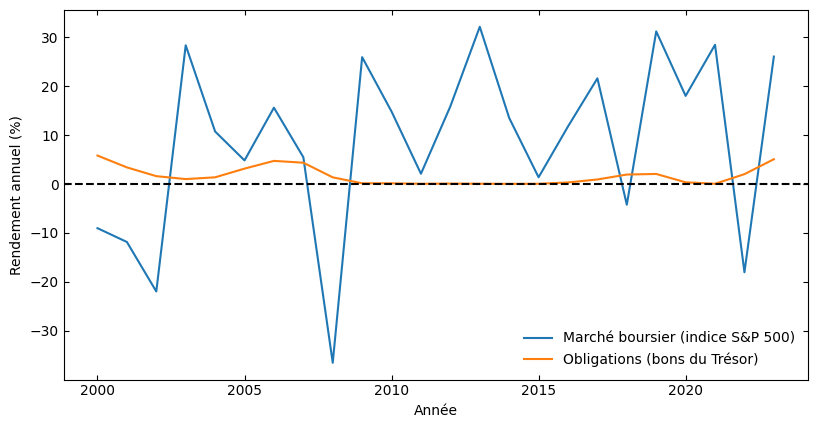

In [122]:
rendements_actions = table["sp500"].values
rendements_obligations = table["tbill"].values

fig, ax = plt.subplots(figsize=(9.6, 4.8))

ax.plot(table.index, rendements_actions, label="Marché boursier (indice S&P 500)")
ax.plot(table.index, rendements_obligations, label="Obligations (bons du Trésor)")
ax.axhline(y=0, color="black", linestyle="--")
ax.set_xlabel("Année")
ax.set_ylabel("Rendement annuel (%)")
ax.tick_params(direction='in', top=True, right=True)
ax.legend(frameon=False)

plt.show()

Pour analyser le risque de l'investissement des voleurs, vous devez **calculer** la moyenne et l'écart-type des rendements annuels des actions et des obligations (**indices:** vous pouvez utiliser les variables `rendements_actions` et `rendements_obligations` de la cellule de code ci-dessus, puis les donner en argument aux fonctions `calculer_moyenne` et `calculer_ecart_type`). Ensuite, vous devez calculer le risque premium des actions par rapport aux obligations, c'est-à-dire la différence entre les rendements moyens des actions et des obligations. Puis, vous devez **exécuter** le code (en cliquant sur la flèche) pour afficher votre analyse statistique. Vous constaterez que la relation entre le risque et le rendement pour ces catégories d'actifs.

In [ ]:
import scipy.stats as stats


def calculer_moyenne(rendements):
    return rendements.mean()

def calculer_ecart_type(rendements):
    return rendements.std()

# TODO: calculer la moyenne et l'écart-type des rendements des actions et des obligations
moyenne_rendements_actions = ...
ecart_type_rendements_actions = ...
moyenne_rendements_obligations = ...
ecart_type_rendements_obligations = ...

# TODO: calculer le risque premium des actions par rapport aux obligations
risque_premium = ...
print(f"Risque premium: {risque_premium:.2f} %")

fig, ax = plt.subplots()

x = np.linspace(moyenne_rendements_actions-2*ecart_type_rendements_actions, moyenne_rendements_actions+2*ecart_type_rendements_actions, 100)
pdf_actions = stats.norm.pdf(x, moyenne_rendements_actions, ecart_type_rendements_actions)
ax.plot(x, pdf_actions / np.max(pdf_actions), label="Actions")
ax.vlines(moyenne_rendements_actions, 0, 1, color="black", linestyle="--")
pdf_obligations = stats.norm.pdf(x, moyenne_rendements_obligations, ecart_type_rendements_obligations)
ax.plot(x, pdf_obligations / np.max(pdf_obligations), label="Obligations")
ax.vlines(moyenne_rendements_obligations, 0, 1, color="black", linestyle="--")
ax.set_xlabel("Rendement annuel (%)")
ax.set_ylabel("Densité de probabilité normalisée")
ax.tick_params(direction='in', top=True, right=True)
ax.legend(frameon=False)

plt.show()
